# Data testing of one .wav file


In [3]:
import matplotlib.pyplot as plt #lib used for graphical representation.
%matplotlib inline

In [4]:
filename='testa.wav'

In [5]:
import IPython.display as ipd #interactive python lib.
import librosa #library used to deal with sound.

# LIBROSA converges stereo into mono.
import librosa.display


# MONO=====>>>> single signal
# STERO====>>>> multiple signals 2/3/4

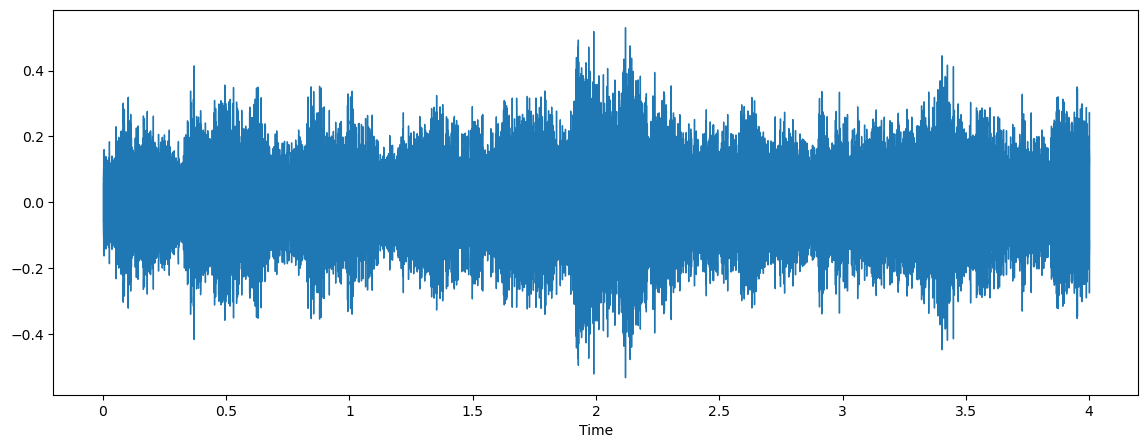

In [6]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate) #sample is a number used for digital representation of Sound.
                                                #Sample==Analog-->>Digital(sound representation).
ipd.Audio(filename)  

In [7]:
sample_rate #Sample rate is the number of samples of audio carried per second. LIBROSA

22050

In [8]:
data ## wave is represented in the frm of array----floating point------normaliased LIBROSA 

#val between 0 and 1

array([-0.00349966,  0.00564218,  0.02533602, ...,  0.01937215,
        0.04364188, -0.00103271], dtype=float32)

In [8]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [9]:
wave_sample_rate                  #SCIPY

#when librosa library is used it gives the normalised sample rate of the data set.
#scipy gives different sample_rate for different .wav files inside the data set.
#scipy gives actual sample rate of the respective .wav file.


44100

In [10]:
wave_audio

#   Here audio signal is represented in an array of integers
#   combination of all these numbers will result in an audio wave form   SCIPY


##Here the audio is of 2 channels ====>>>>  STEREO


array([[ 1080,   585],
       [  178, -1492],
       [-1618,   456],
       ...,
       [ 1530,    18],
       [   45,  -910],
       [ -406,   110]], dtype=int16)

In [11]:
import pandas as pd
metadata=pd.read_csv('UrbanSound8K.csv')

In [12]:
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [13]:
metadata['class'].value_counts()


###  checkin whether the data is balanced or imbalanced
#    The data is balanced and we have enough data for each example to train the model
#    Most of the categories are having enough data samples

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

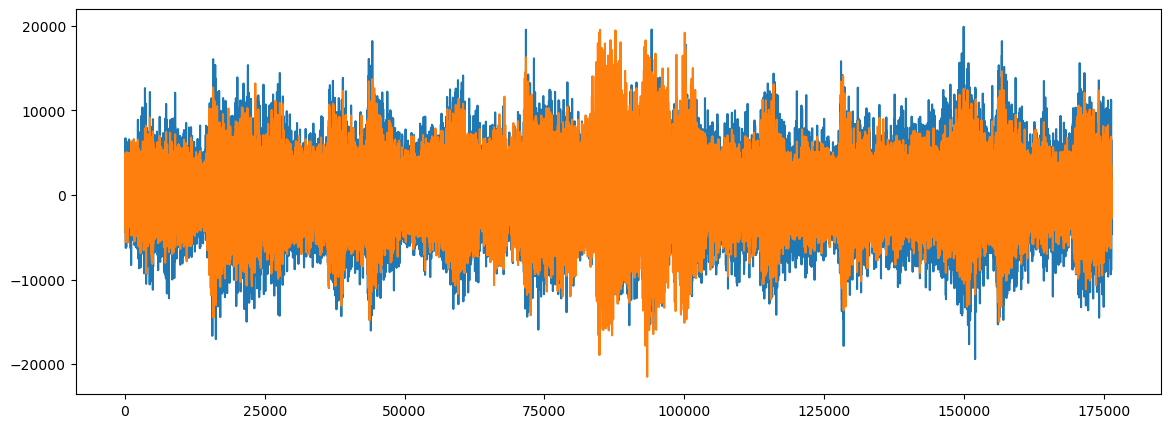

In [14]:
plt.figure(figsize=(14,5))
plt.plot(wave_audio)


#   MULTIIPLE SIGNALS CAN BE EASILY OBSERVED IN THE BELOW GRAPH

Valerio Velarado---Mel-Frequency

MFCC---Mel-Frequency Cepstral Coefficients

--> Used for classification.
--> Easily analyses both frequency and time characteristics of sound.

In [15]:
mfccs=librosa.feature.mfcc(y=data ,sr=sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [16]:
mfccs  ###  patterns extracted from the sample based on the frequency and time caharcteristics.

array([[-131.99217   ,  -97.352295  ,  -79.24685   , ...,  -39.72752   ,
         -39.34586   ,  -65.53262   ],
       [  66.98798   ,   64.59068   ,   66.65431   , ...,   57.818703  ,
          67.34046   ,   74.577866  ],
       [   5.6837344 ,    9.151562  ,    8.169371  , ...,  -20.961979  ,
         -25.301006  ,  -27.002472  ],
       ...,
       [   4.240025  ,    2.1576667 ,   -2.047154  , ...,   -4.5466185 ,
          -2.246551  ,   -1.8710384 ],
       [   1.8032035 ,    0.62349284,    2.0503674 , ...,   -9.225117  ,
          -3.527996  ,    0.6013315 ],
       [   1.6451637 ,    4.4608126 ,    6.31357   , ...,    1.9941115 ,
           0.59125084,    0.87409455]], dtype=float32)

mfccs for multiple files

In [17]:
import pandas as pd
import os
import librosa
import resampy

audio_dataset_path='archive/'
metadata=pd.read_csv('UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [18]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    #kaiser_fast is a parameter in the librosa Python library that controls the speed and accuracy of the resampling algorithm used in the librosa.resample() function. 
    #This parameter allows users to balance between computational speed and resampling quality.
    
    #The kaiser_fast method uses a fast Fourier transform (FFT) algorithm for resampling,
    #with a Kaiser window function applied to the FFT coefficients to minimize aliasing distortion.
    
    
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    
    
    
    
    
    # Feature scaling is the process of normalising the range of features in a dataset.
    
    return mfccs_scaled_features

In [19]:
import numpy as np
from tqdm import tqdm
##tqdm (taqadum) means progress, and it is used to create a smart progress bar for the loops.


### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [02:10, 27.78it/s]C:\Users\anees\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [04:55, 36.51it/s]C:\Users\anees\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\anees\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [05:09, 28.23it/s]


In [20]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [21]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
Y=np.array(extracted_features_df['class'].tolist())

In [1]:
X.shape
X

NameError: name 'X' is not defined

In [23]:
#Y=np.array(pd.get_dummies(Y))  #convert categorical data into 0 or 1
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

#Encode categorical features as a one-hot numeric array
#Assign each categorical value an integer value based on alphabetical order


labelencoder=LabelEncoder()
Y=to_categorical(labelencoder.fit_transform(Y))

In [24]:
Y.shape

(8732, 10)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [26]:
X_train.shape



(6985, 40)

In [27]:
X_train #independent feature


array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305080e+00, -5.27745247e+00, -1.55697143e+00],
       [-4.98715439e+01,  2.65353173e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939763e+00, ...,
         7.42641389e-01,  7.33490944e-01,  7.11009085e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651151e+00]], dtype=float32)

In [28]:
X_test.shape

(1747, 40)

In [29]:
y_train.shape

(6985, 10)

In [30]:
y_test.shape

(1747, 10)

In [31]:
Y #dependent feature

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

CREATING DL MODEL

In [32]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [34]:
### No of classes
num_labels=Y.shape[1]

In [35]:
model=Sequential() #initializing model
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.2))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [36]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [37]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [38]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 3  00
num_batch_size = 32 

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), 
          callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
211/219 [===========================>..] - ETA: 0s - loss: 10.5673 - accuracy: 0.1179
Epoch 1: val_loss improved from inf to 2.29033, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 2ms/step - loss: 10.3141 - accuracy: 0.1175 - val_loss: 2.2903 - val_accuracy: 0.1099
Epoch 2/100
214/219 [============================>.] - ETA: 0s - loss: 2.5436 - accuracy: 0.1287
Epoch 2: val_loss improved from 2.29033 to 2.27537, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 2.5410 - accuracy: 0.1276 - val_loss: 2.2754 - val_accuracy: 0.1208
Epoch 3/100
211/219 [===========================>..] - ETA: 0s - loss: 2.3429 - accuracy: 0.1333
Epoch 3: val_loss improved from 2.27537 to 2.24652, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 2.3426 - accuracy: 0.1339 - val_loss: 2.2465 - val_accuracy: 0.14

219/219 [==============================] - 0s 1ms/step - loss: 1.4800 - accuracy: 0.4853 - val_loss: 1.2563 - val_accuracy: 0.5959
Epoch 26/100
212/219 [============================>.] - ETA: 0s - loss: 1.4489 - accuracy: 0.4975
Epoch 26: val_loss improved from 1.25632 to 1.22302, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 1.4484 - accuracy: 0.4974 - val_loss: 1.2230 - val_accuracy: 0.6153
Epoch 27/100
212/219 [============================>.] - ETA: 0s - loss: 1.4381 - accuracy: 0.5062
Epoch 27: val_loss improved from 1.22302 to 1.22199, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 1.4341 - accuracy: 0.5074 - val_loss: 1.2220 - val_accuracy: 0.6056
Epoch 28/100
214/219 [============================>.] - ETA: 0s - loss: 1.4012 - accuracy: 0.5127
Epoch 28: val_loss improved from 1.22199 to 1.17349, saving model to saved_models\audio_classific

Epoch 78/100
217/219 [============================>.] - ETA: 0s - loss: 1.0113 - accuracy: 0.6672
Epoch 78: val_loss did not improve from 0.81544
219/219 [==============================] - 0s 1ms/step - loss: 1.0103 - accuracy: 0.6673 - val_loss: 0.8257 - val_accuracy: 0.7315
Epoch 79/100
213/219 [============================>.] - ETA: 0s - loss: 1.0026 - accuracy: 0.6653
Epoch 79: val_loss did not improve from 0.81544
219/219 [==============================] - 0s 1ms/step - loss: 1.0021 - accuracy: 0.6657 - val_loss: 0.8370 - val_accuracy: 0.7390
Epoch 80/100
215/219 [============================>.] - ETA: 0s - loss: 1.0106 - accuracy: 0.6690
Epoch 80: val_loss did not improve from 0.81544
219/219 [==============================] - 0s 1ms/step - loss: 1.0096 - accuracy: 0.6683 - val_loss: 0.8284 - val_accuracy: 0.7441
Epoch 81/100
213/219 [============================>.] - ETA: 0s - loss: 0.9938 - accuracy: 0.6730
Epoch 81: val_loss improved from 0.81544 to 0.79691, saving model to sa

In [39]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7424155473709106


TESTING OF THE MODEL TRAINED.


In [40]:
filename="gun.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

predicted_label=np.argmax(model.predict(mfccs_scaled_features), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-3.0559464e+02  9.9004395e+01 -1.0790008e+01 -2.9217460e+00
 -7.7827144e+00  1.3037271e+01 -9.4461066e-01  9.5054579e+00
 -4.1713247e+00  7.6676598e+00 -4.9146285e+00  2.8957694e+00
 -4.9128017e+00  8.0030556e+00  1.4067690e+00  1.3184846e+01
  1.0179321e+01  1.2756021e+01 -2.9507027e+00 -5.2964587e+00
 -6.6284204e+00  5.6509829e+00  5.9163117e+00  4.0064955e+00
 -4.4690461e+00 -6.7026019e-02  3.5525353e+00  7.5026121e+00
 -1.3893751e+00 -4.1212487e+00 -1.9852161e+00  1.5331579e+00
 -6.0757813e+00 -5.2448077e+00  2.0995100e+00  5.7478085e+00
 -2.2317626e+00 -4.3410454e+00  1.4640723e+00  8.9599192e-01]
[[-3.0559464e+02  9.9004395e+01 -1.0790008e+01 -2.9217460e+00
  -7.7827144e+00  1.3037271e+01 -9.4461066e-01  9.5054579e+00
  -4.1713247e+00  7.6676598e+00 -4.9146285e+00  2.8957694e+00
  -4.9128017e+00  8.0030556e+00  1.4067690e+00  1.3184846e+01
   1.0179321e+01  1.2756021e+01 -2.9507027e+00 -5.2964587e+00
  -6.6284204e+00  5.6509829e+00  5.9163117e+00  4.0064955e+00
  -4.4690461e+00 

array(['dog_bark'], dtype='<U16')

In [41]:
from tensorflow.keras.models import load_model

model.save('s_model')

INFO:tensorflow:Assets written to: s_model\assets


INFO:tensorflow:Assets written to: s_model\assets
